<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#Distribuição-Gaussiana" data-toc-modified-id="Distribuição-Gaussiana-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribuição Gaussiana</a></span><ul class="toc-item"><li><span><a href="#Média-e-Variância" data-toc-modified-id="Média-e-Variância-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Média e Variância</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar implementações e investigações a respeito da parte A do exercício 8 do curso de Introdução a Machine Learning (Andrew Ng). Nele, serão considerados os devidos testes para a construção do código responsável pela criação de um sistema de detecção de anomalia, assunto referente a semana 9 do curso.

## Lendo os Dados

In [1]:
# Lendo arquivo e inspecionando variáveis
load('ex8data1.mat')

In [3]:
# Dimensões do conjunto de dados
size(X)

ans =

   307     2



Trata-se de um dataset com 307 linhas e 2 colunas. Tais colunas representam features relacionadas ao comportamento de computadores conectados a um servidor, sendo elas:
    - Latency (ms)
    - Throughput (mb/s)

O objetivo é identificar comportamentos anômalos dentro do servidos através dessas duas features.

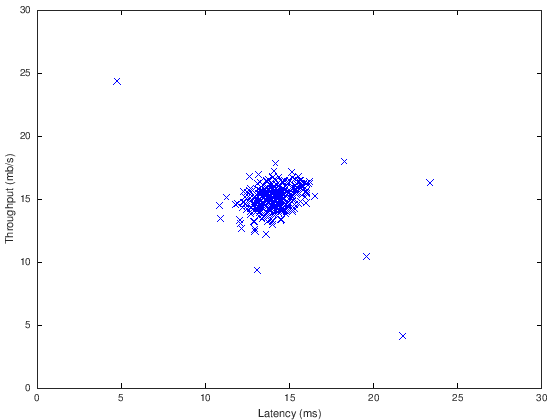

In [6]:
# Visualizando os dados
plot(X(:, 1), X(:, 2), 'bx')
axis([0 30 0 30])
xlabel('Latency (ms)')
ylabel('Throughput (mb/s)')

Visivelmente, através da plotagem, é possível perceber a presença de ```outliers``` no dataset, sejam estes descritos por um aumento anormal na latência, ou na taxa de transferência.

## Distribuição Gaussiana

Neste ponto do exerício, será necessário definir uma função que receba, como argumento, um dataset n-dimensional, tendo como o escopo o cálculo das variáveis necessárias para construção da distribuição gaussiana, ou seja, a média e a variância para cada feature dentro do dataset X

In [7]:
% Retornando dimensões do dataset
[m n] = size(X)

m =  307
n =  2


In [8]:
% Verificando primeiras linhas do dataset
X(1:5, :)

ans =

   13.047   14.741
   13.409   13.763
   14.196   15.853
   14.915   16.174
   13.577   14.043



In [12]:
% Testando laço for
for i=1:n
    fprintf('Head feature %d\n', i)
    X(1:5, i)
endfor

Head feature 1
ans =

   13.047
   13.409
   14.196
   14.915
   13.577

Head feature 2
ans =

   14.741
   13.763
   15.853
   16.174
   14.043



In [13]:
% Testando cálculo da média
latencia = X(:, 1);
latencia(1:5)

ans =

   13.047
   13.409
   14.196
   14.915
   13.577



In [15]:
% Média
mean(latencia)

ans =  14.112


In [23]:
% Testando Variância
sum(((latencia - mean(latencia)).^2))/m

ans =  1.8326


In [21]:
% Outro método
var(latencia)

ans =  1.8386


Vamos repetir este método para a feature de taxa de transferência afim de verificar se implementações futuras estarão corretas.

In [24]:
% Calculando média
tx_transf = X(:, 2);
mean(tx_transf)

ans =  14.998


In [25]:
% Calculando variância (raça)
sum((tx_transf - mean(tx_transf)).^2)/m

ans =  1.7097


In [26]:
% Calculando variância (func)
var(tx_transf)

ans =  1.7153


### Média e Variância

Vamos então implementar a função, em um primeiro momento, com cálculos realizados "na raça", ou seja, sem o auxílio da função ```var()``` do Octave/MATLAB. Vamos expandir os cálculos para que estes possam ser aplicados a qualquer dataset n-dimensional.

In [31]:
% Dimensões do dataset
[m n] = size(X);

% Inicializando vetores
mu = zeros(n, 1);
sigma2 = zeros(n, 1);

% Iterando features e implementando cálculos
for i = 1:n
    media = mean(X(:, i));
    mu(i) = media;
    var = sum((X(:, i) - media).^2)/m;
    sigma2(i) = var;
endfor

In [33]:
% Verificando valores
mu
sigma2

mu =

   14.112
   14.998

sigma2 =

   1.8326
   1.7097



Os valores bateram com os testes realizados. Implementando função

In [34]:
function [mu sigma2] = estimateGaussian(X)
    %ESTIMATEGAUSSIAN This function estimates the parameters of a 
    %Gaussian distribution using the data in X
    %   [mu sigma2] = estimateGaussian(X), 
    %   The input X is the dataset with each n-dimensional data point in one row
    %   The output is an n-dimensional vector mu, the mean of the data set
    %   and the variances sigma^2, an n x 1 vector
    
    % Dimensões do dataset
    [m n] = size(X);

    % Inicializando vetores
    mu = zeros(n, 1);
    sigma2 = zeros(n, 1);

    % Iterando features e implementando cálculos
    for i = 1:n
        media = mean(X(:, i));
        mu(i) = media;
        var = sum((X(:, i) - media).^2)/m;
        sigma2(i) = var;
    endfor
    
endfunction

In [36]:
% Chamando função
[mu sigma] = estimateGaussian(X)

mu =

   14.112
   14.998

sigma =

   1.8326
   1.7097

